## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape


(545, 13)

In [65]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [8]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()
df['price'] = df['price'].fillna(df['price'].mean()) 

In [11]:
#5 Prepare  X (independent variables) and y (dependent variable)

# Define independent (X) and dependent (y) variables
X = df.drop(columns=['price'])  # Remove target variable
y = df['price']  # Target variable

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Display processed X and y
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())


Independent Variables (X):
   area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  7420         4          2        3        2          True          False   
1  8960         4          4        4        3          True          False   
2  9960         3          2        2        2          True          False   
3  7500         4          2        2        3          True          False   
4  7420         4          1        2        2          True           True   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0         False                False                 True          True   
1         False                False                 True         False   
2          True                False                False          True   
3          True                False                 True          True   
4          True                False                 True         False   

   furnishingstatus_semi-furnished  furnishings

ValueError: num must be an integer with 1 <= num <= 12, not 13

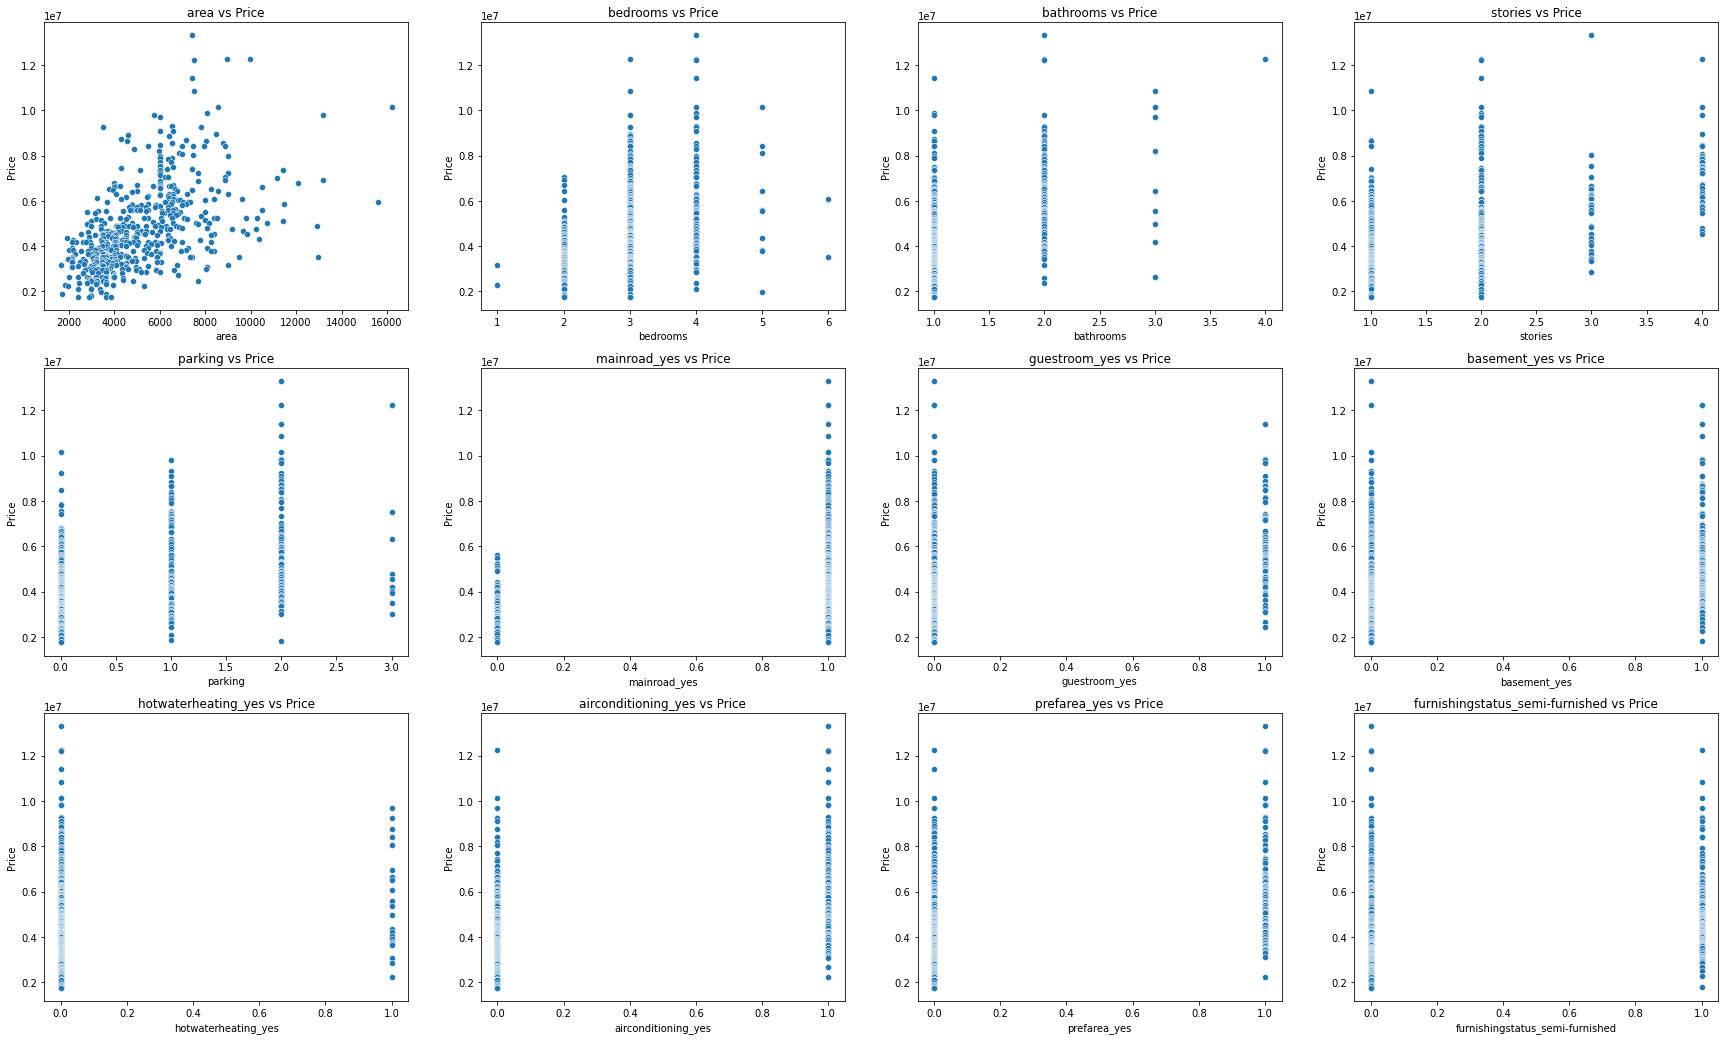

In [18]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatterplots for each independent variable vs dependent variable
plt.figure(figsize=(30, 18))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)  # Adjust based on number of variables
    sns.scatterplot(x=X[column], y=y)
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.title(f"{column} vs Price")

plt.tight_layout()
plt.show()

In [13]:
#7 Encoding categorical data in X
# Convert categorical variables into numerical using One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Display processed X
print("Encoded Independent Variables (X):")
print(X_encoded.head())

Encoded Independent Variables (X):
   area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  7420         4          2        3        2          True          False   
1  8960         4          4        4        3          True          False   
2  9960         3          2        2        2          True          False   
3  7500         4          2        2        3          True          False   
4  7420         4          1        2        2          True           True   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0         False                False                 True          True   
1         False                False                 True         False   
2          True                False                False          True   
3          True                False                 True          True   
4          True                False                 True         False   

   furnishingstatus_semi-furnished  fur

In [ ]:
#8  Avoiding the Dummy Variable Trap

In [17]:
#9 Apply feature scaling on numerical variables
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Identify numerical columns (excluding encoded categorical ones)
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes'
                 ,'airconditioning_yes','prefarea_yes','furnishingstatus_semi-furnished','furnishingstatus_unfurnished']

# Apply scaling only to numerical columns
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# Display scaled data
print("Feature Scaled Independent Variables (X):")
print(X_encoded.head())


Feature Scaled Independent Variables (X):
       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692      0.405623   
1  1.757010  1.403419   5.405809  2.532024  2.679409      0.405623   
2  2.218232  0.047278   1.421812  0.224410  1.517692      0.405623   
3  1.083624  1.403419   1.421812  0.224410  2.679409      0.405623   
4  1.046726  1.403419  -0.570187  0.224410  1.517692      0.405623   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0      -0.465315     -0.734539            -0.219265             1.472618   
1      -0.465315     -0.734539            -0.219265             1.472618   
2      -0.465315      1.361397            -0.219265            -0.679063   
3      -0.465315      1.361397            -0.219265             1.472618   
4       2.149083      1.361397            -0.219265             1.472618   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  

In [20]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Display dataset shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (381, 13), y_train shape: (381,)
X_test shape: (164, 13), y_test shape: (164,)


In [32]:
#11 Fitting Multiple Linear Regression to the Training
# Step 1: Import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 5: Create the Linear Regression model
model = LinearRegression()

# Step 6: Fit the model to the training data
model.fit(X_train, y_train)

# Step 7: Make predictions using the test data
Y_pred = model.predict(X_train)
print(model.intercept_)
print(model.coef_)


4792156.294831953
[ 549164.54164962   59649.5044      559614.4809304   361644.23977858
  260916.61906937  142138.05665122  105458.53398452  230256.71227242
  128949.74488419  318745.84585518  215853.03406393  -59972.42451317
 -183457.57682265]


In [33]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_train_pred=model.predict(X_train)
train_error=y_train_pred-y_train
print(train_error.head())

126   -5.810803e+05
363   -1.098328e+05
370    8.121415e+05
31    -1.926221e+06
113    2.301975e+05
Name: price, dtype: float64


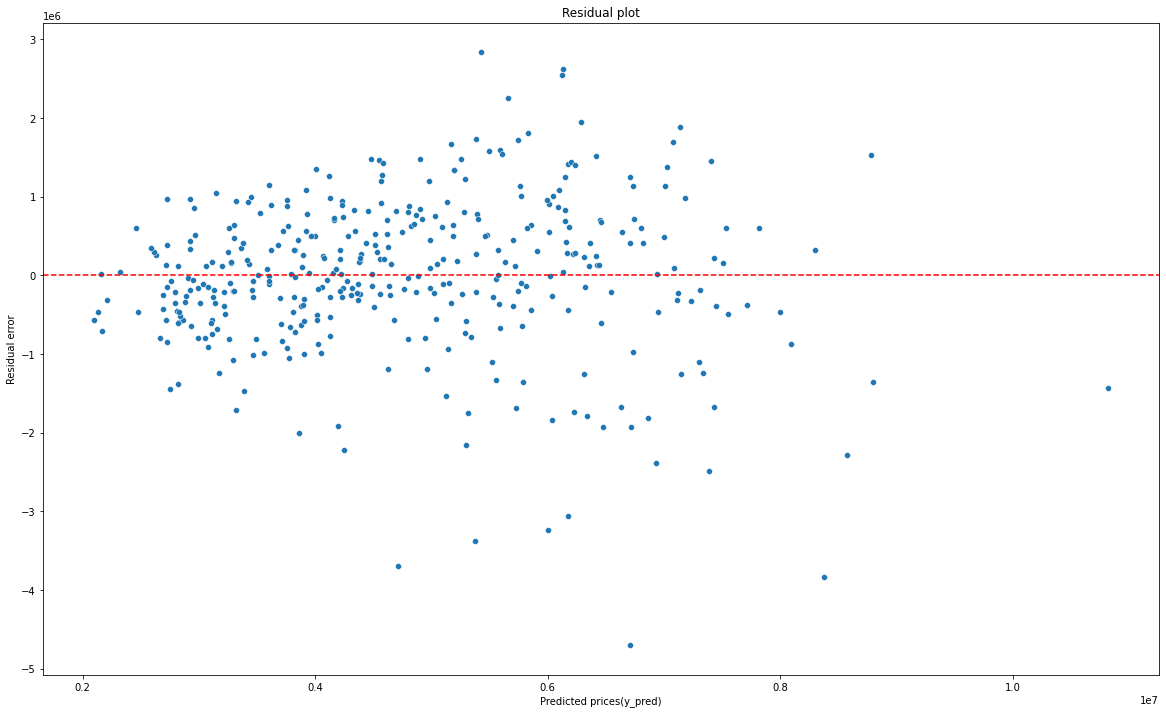

In [41]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
sns.scatterplot(x=y_train_pred, y=train_error)
plt.axhline(y=0, color='red', linestyle="--")
plt.xlabel("Predicted prices(y_pred)")
plt.ylabel("Residual error")
plt.title("Residual plot")
plt.show()

In [47]:
#14  Predic on the test set
y_test_pred=model.predict(X_test)
print(y_test_pred[:10])

[5372312.61614641 7069241.00525806 3099290.78784024 4526446.61703974
 3281573.61192656 3589455.18752547 5728625.30074515 6422877.52476236
 2797870.49568592 2554357.99210552]


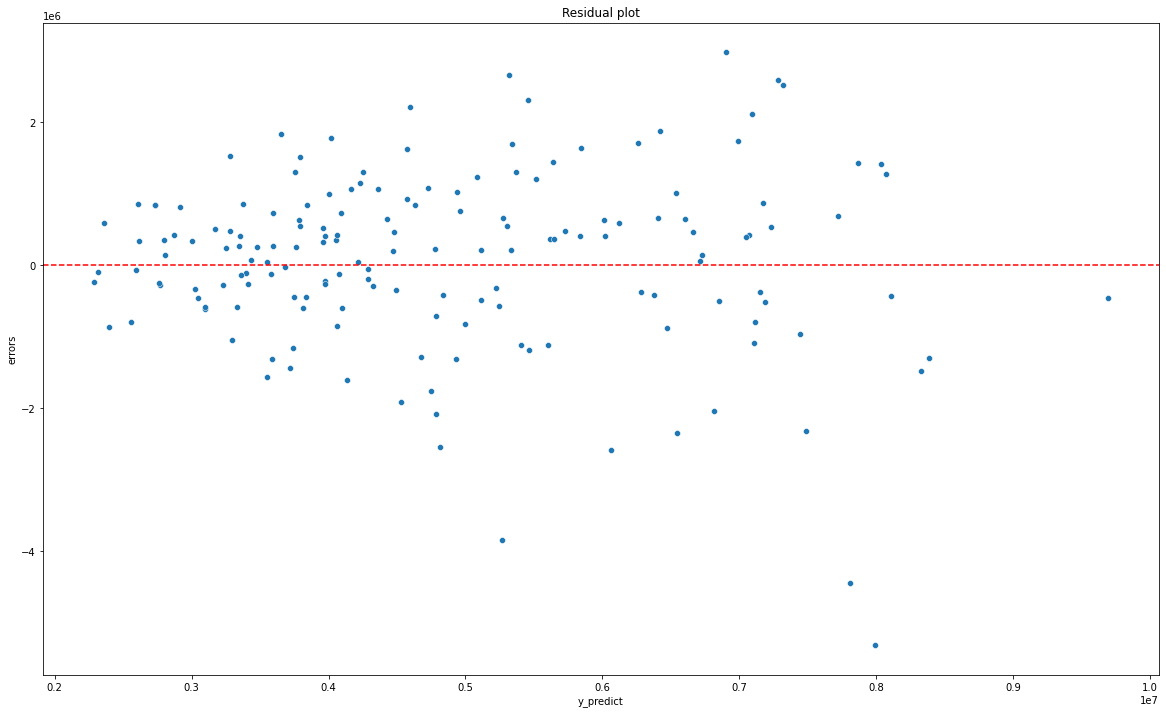

In [57]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
test_error=y_test_pred-y_test
plt.figure(figsize=(20,12))
sns.scatterplot(x=y_test_pred,y=test_error)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("y_predict")
plt.ylabel("errors")
plt.title("Residual plot")
plt.show()

In [67]:
#16 Print Mean Squared Error and R Squared Value
mse = metrics.mean_squared_error(y_test, y_test_pred)
print("mean_square_value = ",mse)
r2=metrics.r2_score(y_test, y_test_pred)
print("r2 value =",r2)


mean_square_value =  1523019469501.2913
r2 value = 0.6463350878895877


In [70]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to calculate Adjusted R-Squared
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to test different feature combinations
def best_feature_selection(X_train, X_test, y_train, y_test):
    best_adj_r2 = -np.inf
    best_features = None
    
    # Iterate over different numbers of features
    for i in range(1, len(X_train.columns) + 1):
        for subset in itertools.combinations(X_train.columns, i):
            X_train_subset = X_train[list(subset)]
            X_test_subset = X_test[list(subset)]
            
            # Train model
            model = LinearRegression()
            model.fit(X_train_subset, y_train)
            
            # Predict and calculate R-Squared
            Y_pred = model.predict(X_test_subset)
            r2 = r2_score(y_test, y_pred)
            
            # Calculate Adjusted R-Squared
            adj_r2 = adjusted_r2(r2, X_train_subset.shape[0], len(subset))
            
            # Store the best result
            if adj_r2 > best_adj_r2:
                best_adj_r2 = adj_r2
                best_features = subset
    
    return best_features, best_adj_r2

# Find the best combination of features
best_features, best_adj_r2 = best_feature_selection(X_train, X_test, y_train, y_test)

print(f"Best feature combination: {best_features}")
print(f"Best Adjusted R-Squared value: {best_adj_r2}")


ValueError: Found input variables with inconsistent numbers of samples: [436, 381]

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 2: Load your dataset
# For example, assume we have a CSV file named 'data.csv'
data = pd.read_csv('data.csv')

# Step 3: Preprocess the data (e.g., handle missing values, encode categorical variables if needed)
# Assuming the dataset has 'X1', 'X2', 'X3' as features and 'Y' as the target
X = data[['X1', 'X2', 'X3']]  # Features
Y = data['Y']  # Target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 5: Create the Linear Regression model
model = LinearRegression()

# Step 6: Fit the model to the training data
model.fit(X_train, Y_train)

# Step 7: Make predictions using the test data
Y_pred = model.predict(X_test)

# Step 8: Evaluate the model
# You can use metrics like Mean Squared Error, Mean Absolute Error, etc.
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
r2 = metrics.r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared (R2): {r2}")
